In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('D:/DATA SCIENCE/Customer Segmentation/Wholesale customers data.csv')

In [19]:
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


# Pemrosesan Data

Mengatas Nilai Kosong

In [21]:
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [22]:
# jika ada nilai kosong maka lakukan menghapus nilai kosong seperti code dibawah ini, 
# berhubung tidak ada nilai yang kosong maka tidak perlu dilakukan
data = data.dropna()

Encoding Kolom Katgeoris

In [23]:
# One-Hot Encoding untuk kolom Channel dan Region
data = pd.get_dummies(data, columns=['Channel', 'Region'])

# Normalisasi Data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

Menentukan Jumlah Cluster Optimal dengan Elbow Method

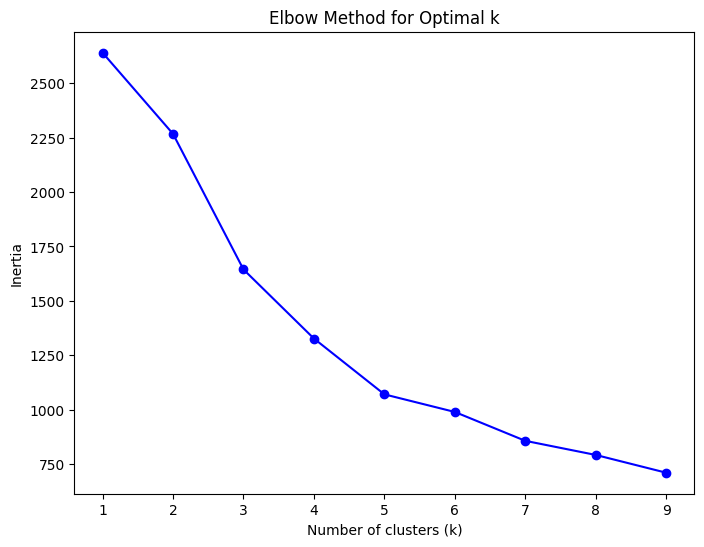

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mencari jumlah cluster yang optimal
inertia = []
K = range(1, 10)  # Mencoba beberapa nilai k dari 1 hingga 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Segmentasi Pelanggan Menggunakan K-Means Clustering

In [27]:
# Misalnya kita memilih k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Menambahkan hasil cluster ke dalam dataset
data['Cluster'] = kmeans.labels_

Analisis dan Visualisasi Hasil

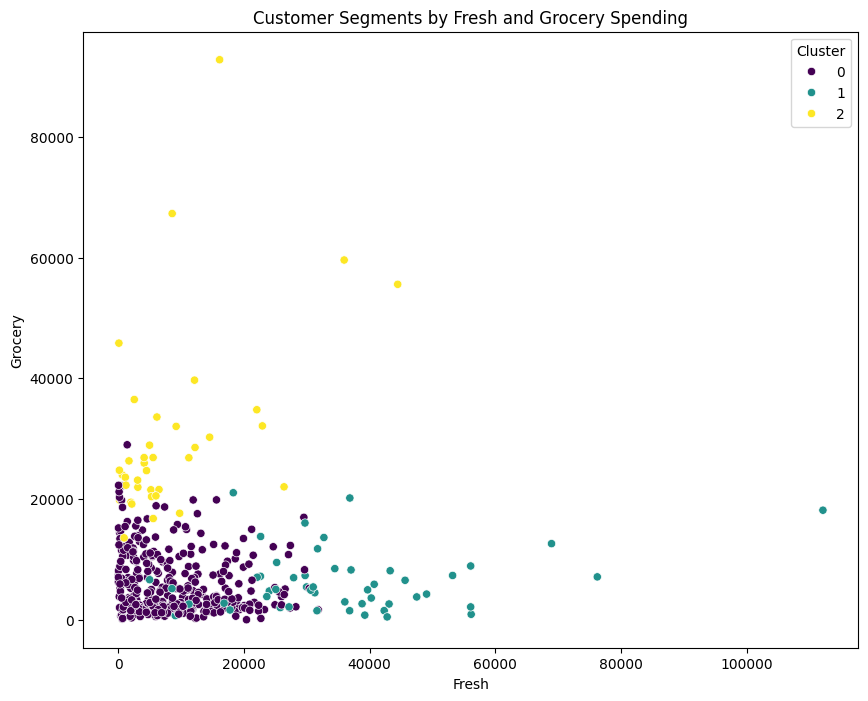

In [28]:
import seaborn as sns

# Visualisasi distribusi kluster berdasarkan dua variabel (contoh: Fresh vs Grocery)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Fresh', y='Grocery', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments by Fresh and Grocery Spending')
plt.show()

Analisis Statistik Rata-Rata di Setiap Kluster

In [29]:
# Rata-rata pengeluaran di tiap cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0         8935.500000   4228.528571   5848.034286  2167.231429   
1        34540.113208   5860.358491   6122.622642  9841.735849   
2         8704.864865  20534.405405  30466.243243  1932.621622   

         Detergents_Paper   Delicassen  Channel_1  Channel_2  Region_1  \
Cluster                                                                  
0             1913.605714  1102.120000   0.717143   0.282857  0.180000   
1              981.471698  3664.245283   0.886792   0.113208  0.132075   
2            14758.837838  2459.351351   0.000000   1.000000  0.189189   

         Region_2  Region_3  
Cluster                      
0        0.105714  0.714286  
1        0.037736  0.830189  
2        0.216216  0.594595  
